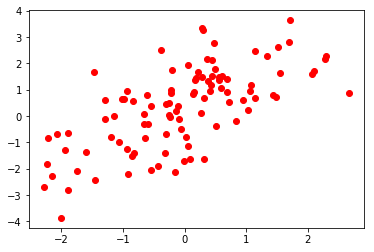

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 산점도 - 100의 표준정규분포 난수 생성
list = []
for i in range(100): # 0 ~ 99
    x = np.random.normal(0,1) # 표준정규분포 난수
    y = x + 0.1 + 0.2 + np.random.normal(0,1)
    list.append([x, y])

x_data = [ v[0] for v in list ] #  v= [x, ]
y_data = [ v[1] for v in list ] #  v= [, y]

plt.plot(x_data, y_data, 'ro')

79.04166666666667 77.125
Ttest_indResult(statistic=0.319960228209846, pvalue=0.755583336185639)
국어 Ttest_indResult(statistic=-2.490140665442242, pvalue=0.031982494983816424)
영어 Ttest_indResult(statistic=-0.6156907152631581, pvalue=0.5518533781528807)
수학 Ttest_indResult(statistic=1.4961318778859336, pvalue=0.1654958420079056)
과학 Ttest_indResult(statistic=4.328442555331755, pvalue=0.0014931977711732465)


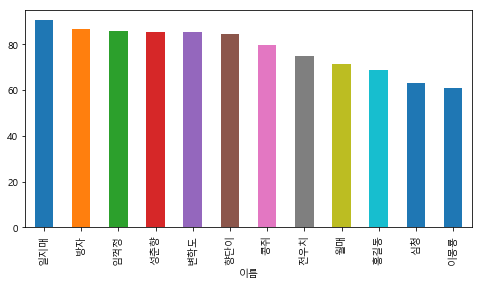

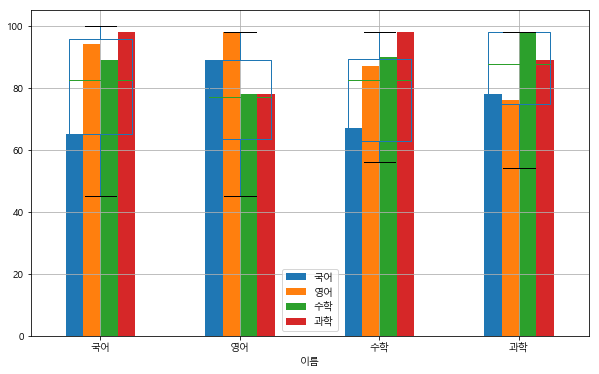

In [12]:
# 성적데이터 읽어오기
df = pd.read_excel('c:/Java/sungjuk.xlsx')

#총점, 평균 계산후 df 에 추가
subj = ['국어', '영어', '수학', '과학']
df['총점'] = df[subj].sum(axis=1)
df['평균'] = df['총점'] / len(subj)
df.sort_values(['평균'], ascending=[False]) # 평균으로 정렬


import matplotlib as mpl
mpl.rc('font', family='Malgun Gothic') # 그래프 한글 설정

sj = df.sort_values(['평균'], ascending=[False])
sj.index = sj['이름']
sj['평균'].plot(kind='bar', figsize=(8,4))


# 성적 비교 - 어느 반이 잘했나?
ban1 = df[df['반'] == 1]
ban2 = df[df['반'] == 2]
ban1_mean = ban1['총점'].sum() / (6 * 4)
ban2_mean = ban2['총점'].sum() / (6 * 4)
print(ban1_mean, ban2_mean) # 79.042 vs 77.125

# 두집단 간의 평균운 유의미하게 차이 나는것인가? (t검증)
# p-value 값이 0.005 이하일때 - 차이가 난다고 할 수 있음
import scipy.stats as stats
result = stats.ttest_ind(ban1['평균'], ban2['평균'])
print(result) # pvalue=0.755583336185639


# 그럼, 과목별 평균은 차이가 나는가? (t검증)
for sub in subj:
    print(sub, stats.ttest_ind(ban1[sub], ban2[sub]))

# 국어 pvalue=0.031982494983816424
# 영어 pvalue=0.5518533781528807
# 수학 pvalue=0.1654958420079056
# 과학 pvalue=0.0014931977711732465


# 전체 성적데이터에 대한 그래프 출력
sj[subj].plot(kind='bar', figsize=(10,6))

# 과목별 점수 분포 - 박스수염 그래프 작성
df[subj].boxplot(return_type='axes')

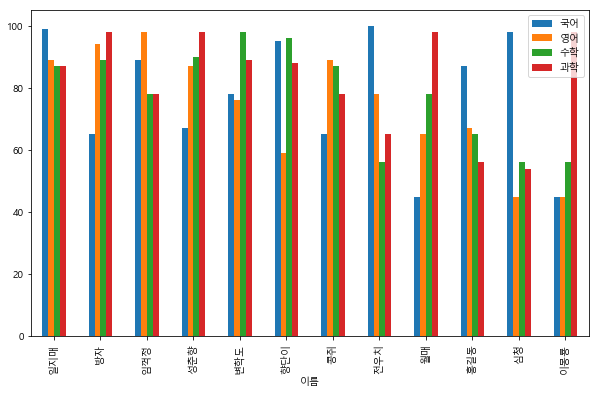

In [13]:
# 전체 성적데이터에 대한 그래프 출력
sj[subj].plot(kind='bar', figsize=(10,6))

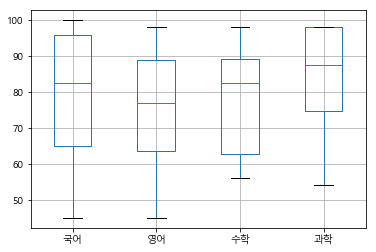

In [14]:
# 과목별 점수 분포 - 박스수염 그래프 작성
df[subj].boxplot(return_type='axes')

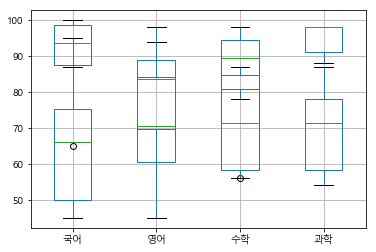

In [15]:
# 일반, 이반 과목별 점수 분포
ban1[subj].boxplot(return_type='axes') # 일반
ban2[subj].boxplot(return_type='axes') # 이반

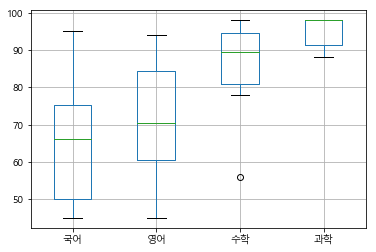

In [16]:
# 일반, 이반 과목별 점수 분포
ban1[subj].boxplot(return_type='axes') # 일반

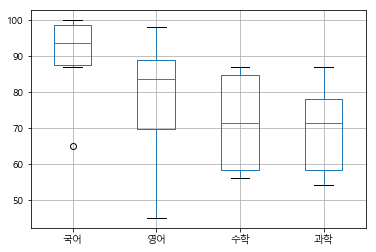

In [17]:
# 일반, 이반 과목별 점수 분포
ban2[subj].boxplot(return_type='axes') # 이반

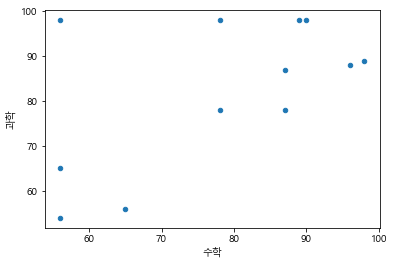

In [18]:
# 과목별 상관관계 - '수학:과학' 와 '국어:영어'
df.plot(kind='scatter', x='수학', y='과학')

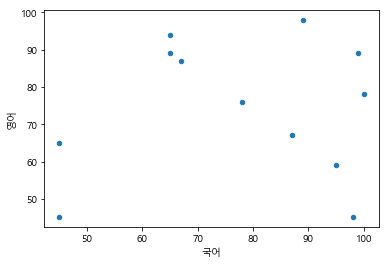

In [19]:
# 과목별 상관관계 - '수학:과학' 와 '국어:영어'
df.plot(kind='scatter', x='국어', y='영어')